# i. inporting libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# ii. importing file

In [41]:
df=pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# iii. Understand our dataset

In [3]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [4]:
df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [5]:
df['Suburb'].unique()

array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
       'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
       'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton', 'Ashwood',
       'Aspendale', 'Aspendale Gardens', 'Attwood', 'Avondale Heights',
       'Balwyn', 'Balwyn North', 'Bayswater North', 'Beaumaris',
       'Bellfield', 'Bentleigh', 'Bentleigh East', 'Black Rock',
       'Blackburn', 'Blackburn North', 'Blackburn South', 'Bonbeach',
       'Boronia', 'Box Hill', 'Braybrook', 'Brighton', 'Brighton East',
       'Broadmeadows', 'Brunswick', 'Brunswick East', 'Brunswick West',
       'Bulleen', 'Bundoora', 'Burwood', 'Burwood East', 'Camberwell',
       'Canterbury', 'Carlton', 'Carlton North', 'Carnegie',
       'Caroline Springs', 'Carrum', 'Carrum Downs', 'Caulfield East',
       'Caulfield North', 'Caulfield South', 'Chadstone', 'Chelsea',
       'Cheltenham', 'Chintin', 'Clayton', 'Clayton South',
       'Clifton Hill', 'Coburg', 'Coburg 

In [6]:
df['SellerG'].unique()

array(['Jellis', 'Marshall', 'Nelson', 'Barry', 'hockingstuart', 'Cayzer',
       'Douglas', 'Bells', 'Miles', 'Barlow', 'Hunter', 'Ray',
       'Fletchers', 'Walshe', 'Noel', 'Philip', 'Buxton', 'Hodges',
       'Woodards', 'Point', 'Stockdale', 'Purplebricks', 'Biggin',
       'Village', 'Boran', 'Jas', 'Kay', 'Prof', 'YPA', 'Rombotis',
       'Brad', 'J', 'RT', 'Garvey', 'Prowse', 'Domain', 'Sweeney',
       'Donovan', 'Gary', "O'Brien", 'LJ', 'Darras', 'C21', 'Peter',
       'Del', 'Jason', 'Bombay', 'iSell', 'Carter', 'McLennan',
       'buyMyplace', 'Raine', 'Mason', 'Lindellas', 'Parkes', 'Caine',
       'hockingstuart/hockingstuart', 'Morrison', 'Chisholm', 'Whiting',
       'Harcourts', 'Love', 'Frank', 'Rendina', 'Win', 'Schroeder',
       'Collins', 'McGrath', 'Eview', 'Aquire', 'Wilson', 'LLC', 'Roger',
       'Darren', 'Buckingham', 'Nick', 'Prof.', 'Greg', 'Haughton',
       'Edward', 'Iconek', "Sotheby's", "Abercromby's", 'Obrien',
       'Grantham', 'Hoskins', 'Benchmar

In [7]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Western Victoria',
       'Eastern Victoria'], dtype=object)

In [8]:
df.Regionname=df.Regionname.map(arg={'Northern Metropolitan':1,'Western Metropolitan':2,'Southern Metropolitan':3,'South-Eastern Metropolitan':4,'Eastern Metropolitan':5,'Northern Victoria':6,'Eastern Victoria':7,'Western Victoria':8})
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,1,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,1,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,1,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,2,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,2,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,1,7955,15.3,Whittlesea City Council


In [9]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Brimbank City Council', 'Port Phillip City Council',
       'Darebin City Council', 'Hobsons Bay City Council',
       'Stonnington City Council', 'Boroondara City Council',
       'Monash City Council', 'Kingston City Council',
       'Hume City Council', 'Maroondah City Council',
       'Bayside City Council', 'Banyule City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Knox City Council', 'Maribyrnong City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Melton City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Casey City Council', 'Greater Dandenong City Council',
       'Moorabool Shire Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Wyndham City Council',
       'Yarra Ranges Shire Council', 'Cardinia Shire Council',
       'Mitchell Shire Council', 'Murrindindi Shire Co

In [10]:
df.Type=df.Type.map(arg={'h':1,'t':2,'u':3})
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,1,1490000.0,S,Jellis,1/04/2017,3067,1,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,1,1220000.0,S,Marshall,1/04/2017,3067,1,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,1,1420000.0,S,Nelson,1/04/2017,3067,1,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,1,1515000.0,S,Barry,1/04/2017,3040,2,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,1,670000.0,S,Nelson,1/04/2017,3042,2,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,1,566000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,1,500000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,1,545000.0,S,Raine,31/03/2018,3064,1,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,3,NaN,PI,Barry,31/03/2018,3074,1,7955,15.3,Whittlesea City Council


In [11]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [12]:
y=df['Price']

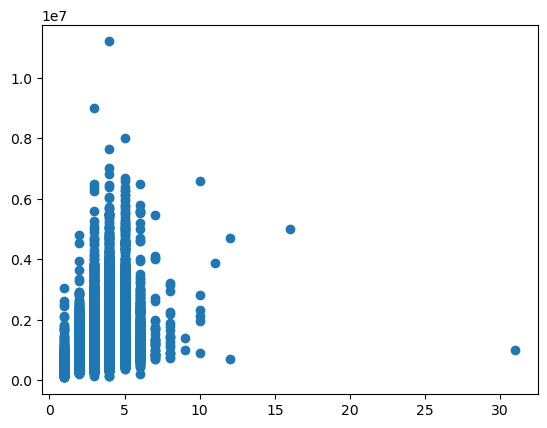

In [13]:
plt.scatter(df['Rooms'], y)
plt.show()

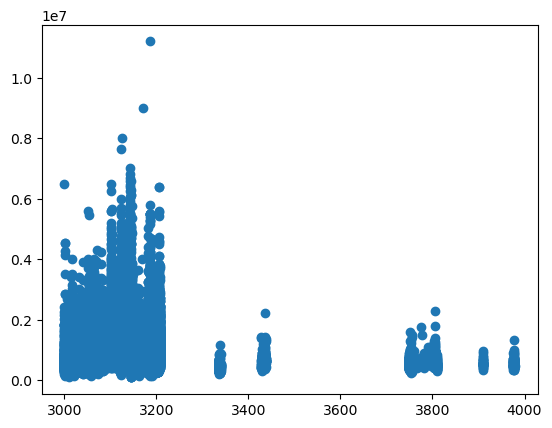

In [14]:
plt.scatter(df['Postcode'], y)
plt.show()

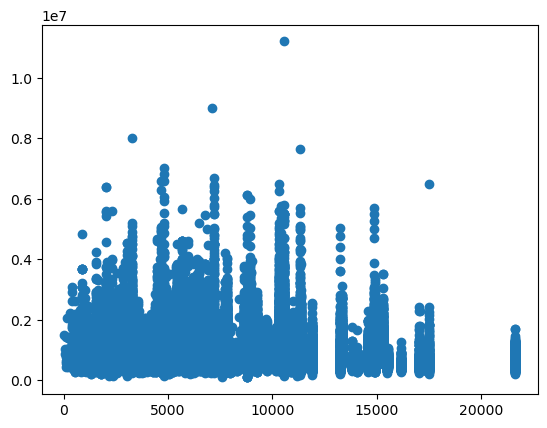

In [15]:
plt.scatter(df['Propertycount'], y)
plt.show()

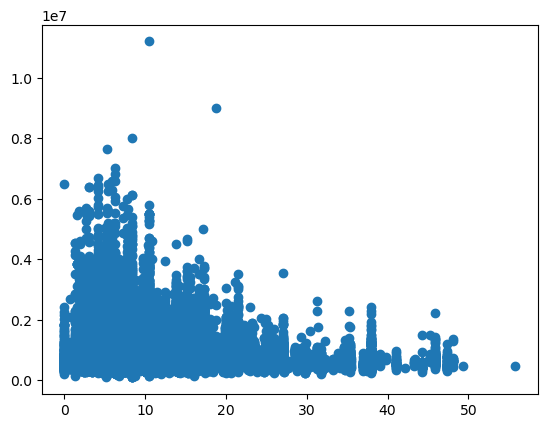

In [16]:
plt.scatter(df['Distance'], y)
plt.show()

In [17]:
df=df.dropna()

In [18]:
df.describe()

,Rooms,Type,Price,Postcode,Regionname,Propertycount,Distance
count,48433.000000,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000,48433.000000
mean,3.071666,1.486528,9.978982e+05,3123.210332,2.712489,7566.399913,12.702761
std,0.944708,0.795950,5.934989e+05,125.534940,1.500519,4457.405884,7.550030
min,1.000000,1.000000,8.500000e+04,3000.000000,1.000000,39.000000,0.000000
25%,2.000000,1.000000,6.200000e+05,3051.000000,1.000000,4280.000000,7.000000
50%,3.000000,1.000000,8.300000e+05,3103.000000,3.000000,6567.000000,11.700000
75%,4.000000,2.000000,1.220000e+06,3163.000000,4.000000,10412.000000,16.700000
max,31.000000,3.000000,1.120000e+07,3980.000000,8.000000,21650.000000,55.800000


# iv. define x and y

In [19]:
x=df[['Rooms','Postcode','Propertycount','Distance','Type','Regionname']]
x

,Rooms,Postcode,Propertycount,Distance,Type,Regionname
0,3,3067,4019,3.0,1,1
1,3,3067,4019,3.0,1,1
2,3,3067,4019,3.0,1,1
3,3,3040,1543,7.5,1,2
4,2,3042,3464,10.4,1,2
...,...,...,...,...,...,...
63016,2,3199,17055,38.0,3,4
63017,3,3072,14577,8.4,1,1
63018,3,3064,5833,20.6,1,1
63019,3,3064,5833,20.6,1,1


In [20]:
y=df['Price']
y

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

# v. train  and test split

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20)

In [22]:
X_train.shape

(38746, 6)

In [23]:
X_test.shape

(9687, 6)

In [24]:
#Y_test = np.array(Y_test).reshape(-1,1)
Y_test.shape

(9687,)

In [25]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_train.shape

(38746, 1)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
scr_lst=[]

#  vi. Model fitting

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, Y_train)  
y_pred= regressor.predict(X_test)  
y_pred = np.array(y_pred).reshape(-1,1)

In [29]:
scr=regressor.score(X_test,Y_test)
scr_lst.append(scr)
print(scr)

0.431682144233835


# Navie Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb= np.array(Y_pred_nb).reshape(-1,1)

In [31]:
scr=nb.score(X_test,Y_test)
scr_lst.append(scr)
print(scr)

0.002684009497264375


# Desion Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
mx_scr=0
mx_i=0
lst=[]
for i in range(20):
    dt = DecisionTreeClassifier(random_state=i)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    scr=dt.score(X_test, Y_test)
    lst.append(scr)
    if(mx_scr<scr):
        mx_scr=scr
        mx_i=i
scr_lst.append(mx_scr)
print(mx_scr,mx_i)

0.04211830288014865 0


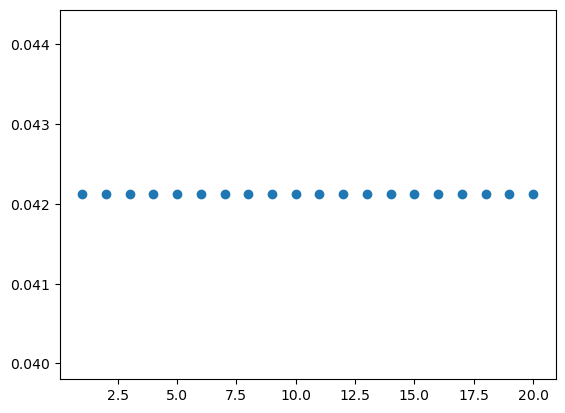

In [33]:
plt.scatter([i for i in range(1,21)],lst)
plt.show()

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
mx_scr=0
mx_i=0
lst=[]
for i in range(1,21):
    rfr = RandomForestRegressor(n_estimators=i)
    rfr.fit(X_train, Y_train)
    Y_pred = rfr.predict(X_train)
    scr=rfr.score(X_test, Y_test)
    lst.append(scr)
    if(mx_scr<scr):
        mx_scr=scr
        mx_i=i
scr_lst.append(mx_scr)
print(mx_scr,mx_i)

0.7501116089651014 12


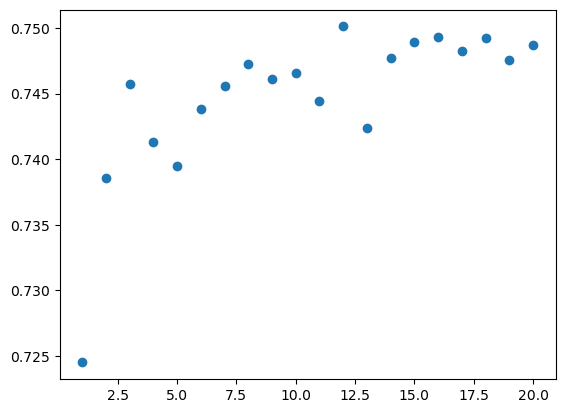

In [35]:
plt.scatter([i for i in range(1,21)],lst)
plt.show()

# K Neighbour Classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier

mx_scr=0
mx_i=0
lst=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred_knn=knn.predict(X_test)
    scr=rfr.score(X_test, Y_test)
    lst.append(scr)
    if(mx_scr<scr):
        mx_scr=scr
        mx_i=i
scr_lst.append(mx_scr)
print(mx_scr,mx_i)

0.7487187517522846 1


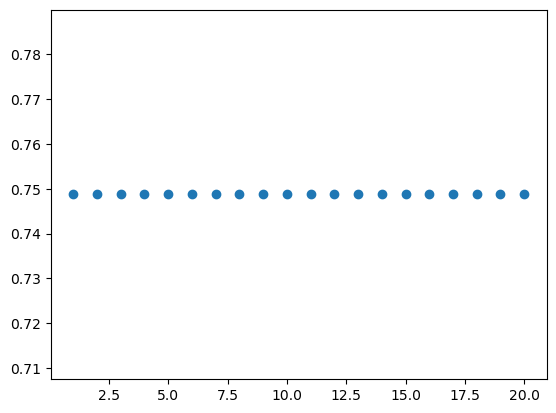

In [37]:
plt.scatter([i for i in range(1,21)],lst)
plt.show()

# ML Model comperesion

In [38]:
scr_lst

[0.431682144233835,
 0.002684009497264375,
 0.04211830288014865,
 0.7501116089651014,
 0.7487187517522846]

In [39]:
ml_lst=['LR','NB','DT','RF','KNN']

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

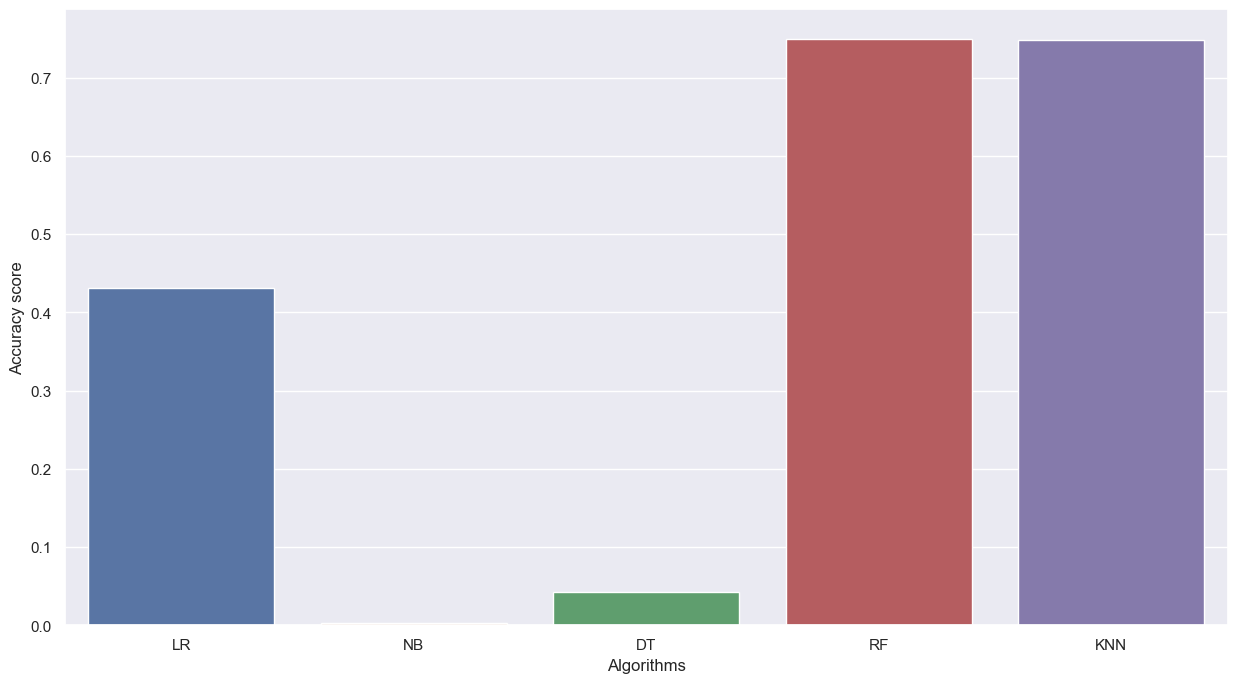

In [40]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(ml_lst,scr_lst)

# It is seen that knn and random forest are best in this